<a href="https://colab.research.google.com/github/wei-enwang/space-ham/blob/main/main_driver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import nltk
from nltk.corpus import words
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils import data
from preprocess import WholeData

import models
import utils

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/weinwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
nltk.download('words')

device = "cuda" if torch.cuda.is_available() else "cpu"
assert device == "cuda"   # use gpu whenever you can!

seed = 32
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

[nltk_data] Downloading package words to /home/weinwang/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [25]:
plot_yes = True

# use one dataset for now
train_data_dir = "./data/enron1/"
test_data_dir = "./data/enron2/"
output_dir = "./output/"

# hyperparameters
batch_size = 33
dropout = 0.5
learning_rate = 1e-4
epochs = 30
max_len = 100

In [4]:
vocab = set([str.lower() for str in words.words()])

train_dataset = WholeData(train_data_dir, src_vocab=vocab, use_max_len=True, max_len=max_len)
test_dataset = WholeData(test_data_dir, src_vocab=vocab, use_max_len=True, max_len=max_len)
w2idx = train_dataset.src_v2id

# embed = utils.load_pretrained_vectors(w2idx, "fastText/crawl-300d-2M.vec")
# embed = torch.tensor(embed)

In [26]:
train_dataloader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, 
                                   num_workers=8, pin_memory=True)
test_dataloader = data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True,
                                  num_workers=8, pin_memory=True, drop_last=True)


In [27]:
model = models.spam_lstm(vocab_size=len(vocab), dropout=dropout).to(device)
loss_fn = nn.BCEWithLogitsLoss().to(device)
opt = Adam(model.parameters(), lr=learning_rate)

  3%|▎         | 1/30 [00:07<03:47,  7.86s/it]

Epoch 0
-------------------------------
Training loss: 0.625506, avg accuracy: 0.563236
Testing loss: 0.575817, avg accuracy: 0.742424


  7%|▋         | 2/30 [00:15<03:39,  7.83s/it]

Epoch 1
-------------------------------
Training loss: 0.581626, avg accuracy: 0.714992
Testing loss: 0.446643, avg accuracy: 0.774398


 10%|█         | 3/30 [00:23<03:31,  7.84s/it]

Epoch 2
-------------------------------
Training loss: 0.512328, avg accuracy: 0.676776
Testing loss: 0.494661, avg accuracy: 0.751117


 13%|█▎        | 4/30 [00:31<03:23,  7.84s/it]

Epoch 3
-------------------------------
Training loss: 0.381662, avg accuracy: 0.826988
Testing loss: 0.400769, avg accuracy: 0.765396


 17%|█▋        | 5/30 [00:39<03:16,  7.85s/it]

Epoch 4
-------------------------------
Training loss: 0.594181, avg accuracy: 0.468394
Testing loss: 0.414218, avg accuracy: 0.801317


 20%|██        | 6/30 [00:47<03:08,  7.85s/it]

Epoch 5
-------------------------------
Training loss: 0.396083, avg accuracy: 0.786938
Testing loss: 0.433571, avg accuracy: 0.692533


 23%|██▎       | 7/30 [00:54<03:00,  7.85s/it]

Epoch 6
-------------------------------
Training loss: 0.425970, avg accuracy: 0.712194
Testing loss: 0.643546, avg accuracy: 0.346442


 27%|██▋       | 8/30 [01:02<02:53,  7.87s/it]

Epoch 7
-------------------------------
Training loss: 0.441458, avg accuracy: 0.813043
Testing loss: 0.611194, avg accuracy: 0.421178


 30%|███       | 9/30 [01:10<02:45,  7.86s/it]

Epoch 8
-------------------------------
Training loss: 0.402737, avg accuracy: 0.730047
Testing loss: 0.505210, avg accuracy: 0.569118


 33%|███▎      | 10/30 [01:18<02:37,  7.86s/it]

Epoch 9
-------------------------------
Training loss: 0.347328, avg accuracy: 0.801028
Testing loss: 0.479875, avg accuracy: 0.610317


 37%|███▋      | 11/30 [01:26<02:29,  7.85s/it]

Epoch 10
-------------------------------
Training loss: 0.315597, avg accuracy: 0.842357
Testing loss: 0.433106, avg accuracy: 0.697140


 40%|████      | 12/30 [01:34<02:21,  7.85s/it]

Epoch 11
-------------------------------
Training loss: 0.282037, avg accuracy: 0.888656
Testing loss: 0.444304, avg accuracy: 0.692022


 43%|████▎     | 13/30 [01:42<02:13,  7.85s/it]

Epoch 12
-------------------------------
Training loss: 0.281466, avg accuracy: 0.883468
Testing loss: 0.422922, avg accuracy: 0.768280


 47%|████▋     | 14/30 [01:49<02:05,  7.85s/it]

Epoch 13
-------------------------------
Training loss: 0.252256, avg accuracy: 0.912734
Testing loss: 0.427896, avg accuracy: 0.777643


 50%|█████     | 15/30 [01:57<01:57,  7.86s/it]

Epoch 14
-------------------------------
Training loss: 0.486607, avg accuracy: 0.844407
Testing loss: 0.364238, avg accuracy: 0.852486


 53%|█████▎    | 16/30 [02:05<01:50,  7.87s/it]

Epoch 15
-------------------------------
Training loss: 0.234752, avg accuracy: 0.926703
Testing loss: 0.481539, avg accuracy: 0.814937


 57%|█████▋    | 17/30 [02:13<01:42,  7.85s/it]

Epoch 16
-------------------------------
Training loss: 0.203362, avg accuracy: 0.941638
Testing loss: 0.409785, avg accuracy: 0.852177


 60%|██████    | 18/30 [02:21<01:34,  7.87s/it]

Epoch 17
-------------------------------
Training loss: 0.197449, avg accuracy: 0.940214
Testing loss: 0.401433, avg accuracy: 0.854209


 63%|██████▎   | 19/30 [02:29<01:26,  7.86s/it]

Epoch 18
-------------------------------
Training loss: 0.189340, avg accuracy: 0.935847
Testing loss: 0.380178, avg accuracy: 0.857103


 67%|██████▋   | 20/30 [02:37<01:18,  7.84s/it]

Epoch 19
-------------------------------
Training loss: 0.162123, avg accuracy: 0.940094
Testing loss: 0.368129, avg accuracy: 0.859838


 70%|███████   | 21/30 [02:44<01:10,  7.83s/it]

Epoch 20
-------------------------------
Training loss: 0.129511, avg accuracy: 0.956114
Testing loss: 0.365022, avg accuracy: 0.866658


 73%|███████▎  | 22/30 [02:52<01:02,  7.85s/it]

Epoch 21
-------------------------------
Training loss: 0.101058, avg accuracy: 0.966922
Testing loss: 0.363837, avg accuracy: 0.874330


 77%|███████▋  | 23/30 [03:00<00:54,  7.85s/it]

Epoch 22
-------------------------------
Training loss: 0.082994, avg accuracy: 0.969311
Testing loss: 0.410348, avg accuracy: 0.862253


 80%|████████  | 24/30 [03:08<00:47,  7.85s/it]

Epoch 23
-------------------------------
Training loss: 0.088047, avg accuracy: 0.974064
Testing loss: 0.391013, avg accuracy: 0.874000


 83%|████████▎ | 25/30 [03:16<00:39,  7.85s/it]

Epoch 24
-------------------------------
Training loss: 0.068022, avg accuracy: 0.977997
Testing loss: 0.434658, avg accuracy: 0.851698


 87%|████████▋ | 26/30 [03:24<00:31,  7.85s/it]

Epoch 25
-------------------------------
Training loss: 0.098594, avg accuracy: 0.969046
Testing loss: 0.414574, avg accuracy: 0.873638


 90%|█████████ | 27/30 [03:32<00:23,  7.86s/it]

Epoch 26
-------------------------------
Training loss: 0.063628, avg accuracy: 0.981664
Testing loss: 0.409374, avg accuracy: 0.867871


 93%|█████████▎| 28/30 [03:39<00:15,  7.85s/it]

Epoch 27
-------------------------------
Training loss: 0.055880, avg accuracy: 0.984559
Testing loss: 0.421653, avg accuracy: 0.873319


 97%|█████████▋| 29/30 [03:47<00:07,  7.84s/it]

Epoch 28
-------------------------------
Training loss: 0.057925, avg accuracy: 0.984945
Testing loss: 0.441666, avg accuracy: 0.876202


100%|██████████| 30/30 [03:55<00:00,  7.85s/it]

Epoch 29
-------------------------------
Training loss: 0.048115, avg accuracy: 0.988226
Testing loss: 0.453759, avg accuracy: 0.872468


Final testing loss: 0.453759, testing accuracy: 0.872468
F1 score: 0.912334 Precision: 0.934375, Recall: 0.891309


(0.04811531618522231, 0.45375914563519065)

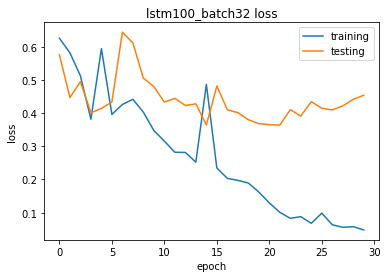

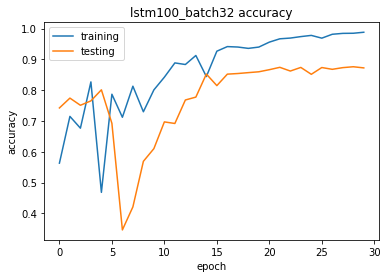

In [28]:
utils.train_test_scheme(train_dataloader, test_dataloader, model, loss_fn, opt, 
                        task_name="lstm100_batch32", epochs=epochs, 
                        vis=plot_yes, print_every=1, img_dir=output_dir)



In [8]:
torch.save(model.state_dict(), output_dir+"lstmlen100_batch256.pt")